In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("advertising.csv")

print("Mau va dac trung :", df.shape)

print("Cot du lieu:", df.columns)

print("Bang gia tri thieu:", df.isnull().sum())


Mau va dac trung : (200, 4)
Cot du lieu: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Bang gia tri thieu: TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


             TV     Sales
TV     1.000000  0.901208
Sales  0.901208  1.000000


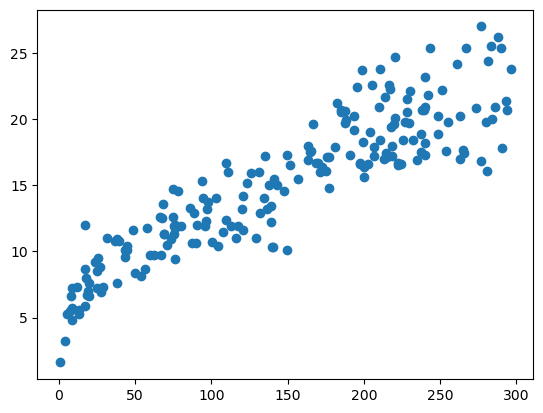

In [22]:
plt.scatter(df['TV'], df['Sales'])
df_tv_sales = df[['TV', 'Sales']]

print(df_tv_sales.corr())

In [35]:
X = df['TV']
y = df['Sales']

def my_train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("X va Y khong cung chieu du lieu")
        
    n_samples = X.shape[0]
    
    n_train = int(n_samples - (n_samples * test_size))
    
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test
    

X_scaled = (X - X.min()) / (X.max() - X.min())
print(X_scaled)

X_train, X_test, y_train, y_test = my_train_test_split(X_scaled, y, 0.2, 42)

print (X_train, X_test)
print (y_train, y_test)

0      0.775786
1      0.148123
2      0.055800
3      0.509976
4      0.609063
         ...   
195    0.126818
196    0.316199
197    0.596212
198    0.956713
199    0.782550
Name: TV, Length: 200, dtype: float64
[0.54988164 0.65843761 0.98816368 0.03719986 0.74264457 0.25160636
 0.73080825 0.16672303 0.74974636 0.58978695 0.10415962 0.18769023
 0.79066622 0.01589449 0.46939466 0.5732161  0.02231992 0.66587758
 0.25228272 0.80047345 0.77375719 0.22691917 0.12614136 0.84612783
 0.23097734 0.17855935 0.71964829 0.4687183  0.29252621 0.02603991
 0.67331755 0.2316537  0.67027393 0.05478526 0.94690565 0.8031789
 0.16097396 0.92323301 0.39398039 0.0906324  0.38992222 0.59621238
 0.14338857 0.20831924 0.75515725 0.12681772 0.23638823 0.49577274
 0.35136963 0.25566452 0.26208996 0.56712885 0.02705445 0.02401082
 0.25600271 0.43523842 0.24585729 0.9773419  0.06391613 0.66587758
 0.95908015 0.62292864 0.37943862 0.07811972 0.98072371 0.06323977
 0.99053094 0.06087251 0.45180927 0.08420697 0.337

In [100]:
def predict(X, w0, w1):
    return np.array(w0 + w1 * X)

def loss_function(y_true, y_pred):
    n = y_true.shape[0]
    return (1.0 / n) * (((y_true - y_pred) ** 2).sum())

def gradient(X, y, w0, w1):
    n = int(X.shape[0])
    y_pred = predict(X, w0, w1)
    dw0 = (-2.0/n) * ((y - y_pred).sum())
    dw1 = (-2.0/n) * ((X * (y - y_pred)).sum())
    return dw0, dw1

In [101]:
lr = 0.01
epochs = 1000
w0 = 0
w1 = 0
losses = []

for epoch in range(epochs):
    dw0, dw1 = gradient(X_train, y_train, w0, w1)
    w0 -= lr * dw0
    w1 -= lr * dw1
    y_pred = predict(X_train, w0, w1)
    loss = loss_function(y_train, y_pred)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss}')

              

Epoch 0, Loss 241.57637308257196
Epoch 100, Loss 12.6595243697739
Epoch 200, Loss 9.7957488749477
Epoch 300, Loss 8.660073235892435
Epoch 400, Loss 7.800182615709591
Epoch 500, Loss 7.144295769622272
Epoch 600, Loss 6.6439844615428605
Epoch 700, Loss 6.262346188089928
Epoch 800, Loss 5.971231895919802
Epoch 900, Loss 5.749169443059612


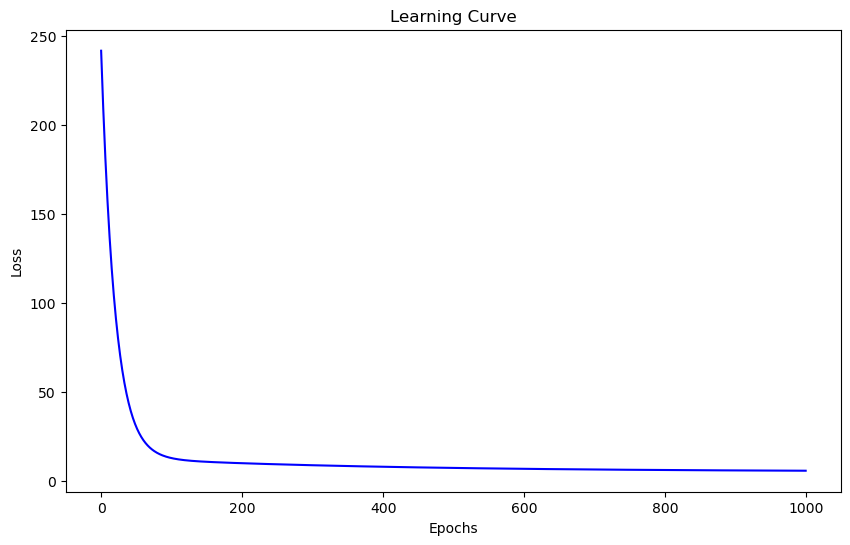

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(losses, color='blue')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Mean Squared Error: 6.93015458599665
Root Mean Squared Error: 2.6325186772360514
Mean Absolute Error: 2.0224575538471674
R-squared: 0.5274147647605398


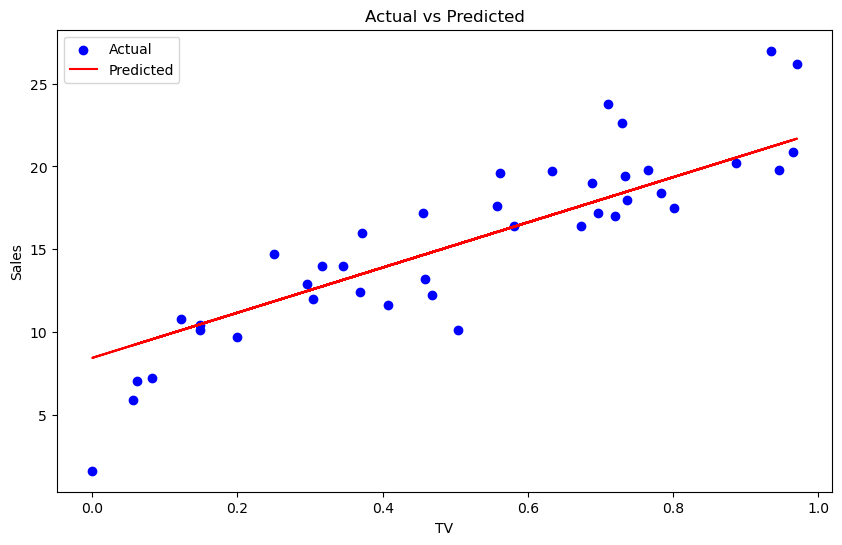

In [109]:
def evaluate(X, y, w0, w1):
    mse = (1 / X.shape[0]) * (((y_pred - y_test) ** 2).sum())
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    mae = np.mean(np.abs(y_test - y_pred))
    r2 = 1 - (((y_pred - y_test) ** 2).sum()) / (((y_pred - y_test.mean()) ** 2).sum())
    return mse, rmse, mae, r2

y_pred = predict(X_test, w0, w1)
mse, rmse, mae, r2 = evaluate(X_test, y_test, w0, w1)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()